## Vehicle Detection Project

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector.
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.

---
## 1. Data Exploration & Extracting HOG Features

Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


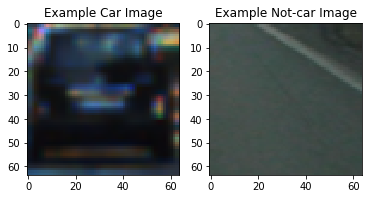

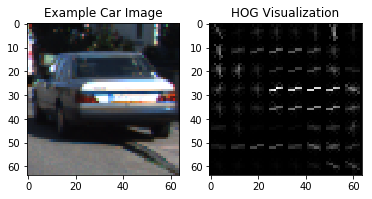

In [5]:
import numpy as np
import cv2
import glob
import pickle
from skimage.feature import hog
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


def read_dataset():
    # Make a list of Vehicle & Non Vehicle images
    car_images1 = glob.glob('./vehicles/GTI_Far/*.png')
    car_images2 = glob.glob('./vehicles/GTI_Left/*.png')
    car_images3 = glob.glob('./vehicles/GTI_MiddleClose/*.png')
    car_images4 = glob.glob('./vehicles/GTI_Right/*.png')
    car_images5 = glob.glob('./vehicles/KITTI_extracted/*.png')

    notcar_images1 = glob.glob('./non-vehicles/Extras/*.png')
    notcar_images2 = glob.glob('./non-vehicles/GTI/*.png')

    cars = []
    notcars = []

    for image1 in car_images1:
        cars.append(image1)

    for image2 in car_images2:
        cars.append(image2)

    for image3 in car_images3:
        cars.append(image3)

    for image4 in car_images4:
        cars.append(image4)

    for image5 in car_images5:
        cars.append(image5)    

    for image6 in notcar_images1:
        notcars.append(image6)

    for image7 in notcar_images2:
        notcars.append(image7) 
    
    return cars, notcars

def data_look(car_list, notcar_list):
    
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict


def plot_car():
    cars, notcars = read_dataset()
    data_info = data_look(cars, notcars)

    print('Your function returned a count of', 
          data_info["n_cars"], ' cars and', 
          data_info["n_notcars"], ' non-cars')
    print('of size: ',data_info["image_shape"], ' and data type:', 
          data_info["data_type"])
    # Just for fun choose random car / not-car indices and plot example images   
    car_ind = np.random.randint(0, len(cars))
    notcar_ind = np.random.randint(0, len(notcars))

    # Read in car / not-car images
    car_image = mpimg.imread(cars[car_ind])
    notcar_image = mpimg.imread(notcars[notcar_ind])


    # Plot the examples
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(car_image)
    plt.title('Example Car Image')
    plt.subplot(122)
    plt.imshow(notcar_image)
    plt.title('Example Not-car Image')

    
plot_car()

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features

def plot_hog():    
    cars, notcars = read_dataset()
    # Generate a random index to look at a car image
    ind = np.random.randint(0, len(cars))
    # Read in the image
    image = mpimg.imread(cars[ind])
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Define HOG parameters
    orient = 9
    pix_per_cell = 8
    cell_per_block = 2
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(gray, orient, 
                            pix_per_cell, cell_per_block, 
                            vis=True, feature_vec=False)

    # Plot the examples
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Example Car Image')
    plt.subplot(122)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Visualization')
    
plot_hog()

## 2. Pipeline (test images)

#### 1. Provide example of a distortion-corrected image

The horizon and landscape on the undistorted image shows a change.

#### 2. Binary Image Result

#### 3. Perspective Transform Image Result

#### 4. Identify Lane Line Pixels

#### 5. Identify Radius of Curvature & Vehicle Position

#### 6. Pipeline for Test Images

In [ ]:
# Intial Pipeline
def pipeline(img, ksize):
    
    #Run this Pipeline to test all methods
            
    # Undistort image
    undistorted_test = cal_undistort(img, objpoints, imgpoints)
    
    # Sobel Operator (X or Y Gradient)    
    gradx = abs_sobel_thresh(undistorted_test, orient='x', sobel_kernel=ksize, thresh=(15, 255))
    grady = abs_sobel_thresh(undistorted_test, orient='y', sobel_kernel=ksize, thresh=(30, 255))

    # Sobel Magnitude of Gradient
    mag_binary = mag_thresh(undistorted_test, sobel_kernel=ksize, mag_thresh=(40, 255))
    
    # Sobel Direction of Gradient
    dir_binary = dir_threshold(undistorted_test, sobel_kernel=ksize, thresh=(0, 0.09))

    # HLS Color Channel S - Channel
    s_channel = hls_s(undistorted_test, thresh=(120, 255))
    
    # HLS Color Channel S - Channel
    l_channel = hls_l(undistorted_test, thresh=(210, 255))
    
    # Combine X,Y,Mag gradient, and S - Channel
    combined = np.zeros_like(l_channel)
    combined[(s_channel == 1) | (l_channel == 1)] = 1
    
    # Area of Interest Mask
    area_img = region_of_interest(combined)
    
    # Perspective Transform
    binary_warped, perspective_M, M_inv = corners_unwarp(area_img)
    
    fig, axs = plt.subplots(3,3, figsize=(16, 12))
    fig.subplots_adjust(hspace = .4, wspace=.001)
    axs = axs.ravel()
    axs[0].imshow(undistorted_test)
    axs[0].set_title('Undistorted Image', fontsize=20)
    axs[1].imshow(gradx, cmap='gray')
    axs[1].set_title('Gradient X', fontsize=20)
    axs[2].imshow(grady, cmap='gray')
    axs[2].set_title('Gradient Y', fontsize=20)
    axs[3].imshow(mag_binary, cmap='gray')
    axs[3].set_title('Sobel Magnitude', fontsize=20)
    axs[4].imshow(dir_binary, cmap='gray')
    axs[4].set_title('Sobel Directional', fontsize=20)
    axs[5].imshow(s_channel, cmap='gray')
    axs[5].set_title('HLS S-Channel', fontsize=20)
    axs[6].imshow(l_channel, cmap='gray')
    axs[6].set_title('HLS L-channel', fontsize=20)
    axs[7].imshow(combined, cmap='gray')
    axs[7].set_title('Combined Image', fontsize=20)
    axs[8].imshow(binary_warped, cmap='gray')
    axs[8].set_title('Perspective Transform', fontsize=20)
    
# Demo All Functions
ksize=5 # Setting Kernel Size
test_image = cv2.imread('./test_images/test3.jpg')
pipeline(test_image, ksize)


## 3. Pipeline Video

In [ ]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None

def video_process(img):
    global i, ploty_p, left_fitx_p, right_fitx_p, leftx_p, rightx_p, lefty_p, righty_p, hist_p
    global ploty_pi, left_fitx_pi, right_fitx_pi, leftx_pi, rightx_pi, lefty_pi, righty_pi, hist_pi
    img_t = img
    offset = 100
    undist, bin_img, M, M_inverse = pipeline2(img_t, ksize)    
    #Plot the Result
    ploty, left_fitx, right_fitx, leftx, rightx, lefty, righty, hist = slidingwindow(bin_img)
    left_curverad, right_curverad = radius_curv(bin_img, ploty, leftx, rightx, lefty, righty)
    pos_off = dist_from_center(hist)
    
    if int((left_curverad + right_curverad)/2) > 900:
        ploty_p, left_fitx_p, right_fitx_p, leftx_p, rightx_p, lefty_p, righty_p, hist_p = ploty, left_fitx, right_fitx, leftx, rightx, lefty, righty, hist
        lane_img = draw_lines(undist, bin_img, ploty, left_fitx, right_fitx, M_inverse)
        result = write_details(undist, lane_img, pos_off, (left_curverad + right_curverad)/2) 
        i = i+1
        if (i-offset == 100):
            ploty_pi, left_fitx_pi, right_fitx_pi, leftx_pi, rightx_pi, lefty_pi, righty_pi, hist_pi = ploty, left_fitx, right_fitx, leftx, rightx, lefty, righty, hist
    elif int((left_curverad + right_curverad)/2) < 900:
        ploty, left_fitx, right_fitx, leftx, rightx, lefty, righty, hist = ploty_pi, left_fitx_pi, right_fitx_pi, leftx_pi, rightx_pi, lefty_pi, righty_pi, hist_pi
        lane_img = draw_lines(undist, bin_img, ploty, left_fitx, right_fitx, M_inverse)
        result = write_details(undist, lane_img, pos_off, (left_curverad + right_curverad)/2) 

    return result    

In [ ]:
yellow_output = 'yellow_latest_version_9.mp4'
clip2 = VideoFileClip('project_video.mp4', audio=False)
yellow_clip = clip2.fl_image(video_process)
%time yellow_clip.write_videofile(yellow_output, audio=False)